---


<h1 style="text-align:center"> 
Lung Cancer Classification using CT Data (Smoke Detector)
</h1><style>

--- 
## Libraries


In [23]:
import pandas as pd
import pylidc as pl
import xml.etree.ElementTree as ET

---

## Importing XML files

In [2]:
import pylidc as pl
import numpy as np 
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 640x480 with 0 Axes>

In [6]:
#%pip install xlrd

In [14]:
nodule_counts_df = pd.read_excel('lidc-idri-nodule-counts-6-23-2015.xlsx')
nodule_counts_df
#maybe eliminar quarta e quinta coluna

,TCIA Patent ID,Total Number of Nodules*,Number of Nodules >=3mm**,Number of Nodules <3mm***,Unnamed: 4,Unnamed: 5
0,LIDC-IDRI-0001,4,1,3,NaN,NaN
1,LIDC-IDRI-0002,12,1,11,NaN,*total number of lesions that received either ...
2,LIDC-IDRI-0003,4,4,0,NaN,"**total number of lesions that received a ""nod..."
3,LIDC-IDRI-0004,4,1,3,NaN,"***total number of lesions that received a ""no..."
4,LIDC-IDRI-0005,9,3,6,NaN,NaN
...,...,...,...,...,...,...
1014,LIDC-IDRI-1009,2,1,1,NaN,NaN
1015,LIDC-IDRI-1010,10,1,9,NaN,NaN
1016,LIDC-IDRI-1011,4,4,0,NaN,NaN
1017,LIDC-IDRI-1012,1,1,0,NaN,NaN


In [17]:
pacient_data_df = pd.read_excel('tcia-diagnosis-data-2012-04-20.xls')
pacient_data_df 
#nem todos os pacientes têm historial registado (157 em 1010)

,TCIA Patient ID,"Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n",Diagnosis Method\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response,Primary tumor site for metastatic disease,"Nodule 1\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 1\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 2\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 2\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 3\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 3\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 4\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 4\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 5\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 5\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n
0,LIDC-IDRI-0068,3,4,Head & Neck Cancer,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LIDC-IDRI-0071,3,1,Head & Neck,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LIDC-IDRI-0072,2,4,Lung Cancer,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LIDC-IDRI-0088,3,0,Uterine Cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIDC-IDRI-0090,2,3,NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,LIDC-IDRI-0994,2,3,LUL Large cell CA,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,LIDC-IDRI-1002,2,2,non-small cell carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,LIDC-IDRI-1004,2,3,LUL NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,LIDC-IDRI-1010,0,0,lymphoma,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---


## Importing Annotations

In [22]:
path_to_annotations = 'LIDC-XML-only'

In [6]:
path = 'C:/Users/Daniela/Desktop/Fac/3ºano/Lab_IACD/Project1/manifest-1727162347556/LIDC-IDRI'
f = open('C:/Users/Daniela/pylidc.conf', 'w')
f.write(f'[dicom]\npath = {path}\n\n')
f.close()

In [3]:
pid = 'LIDC-IDRI-0001'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

Loading dicom files ... This may take a moment.
(512, 512, 133)


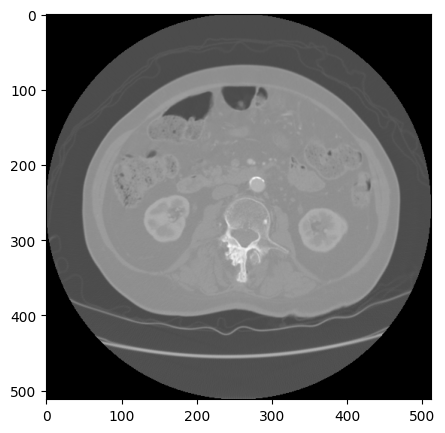

In [7]:
vol = scan.to_volume()
print(vol.shape) # (dim, dim, depth)

plt.figure(figsize=(5, 5))
plt.imshow(vol[:,:,0])
plt.show() # show the first-level slice

In [19]:
!pip freeze

argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==3.3.2
colorama @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/colorama_1699472650914/work
comm @ file:///C:/b/abs_67a8058udb/croot/comm_1709322909844/work
configparser==7.1.0
contourpy==1.2.1
cycler==0.12.1
debugpy @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/debugpy_1699554994633/work
decorator @ file:///opt/conda/conda-bld/decorator_1643638310831/work
executing @ file:///opt/conda/conda-bld/executing_1646925071911/work
fonttools==4.51.0
graphviz==0.20.3
greenlet==3.1.1
idna==3.7
imageio==2.35.1
ipykernel @ file:///C:/b/abs_c2u94kxcy6/croot/ipykernel_1705933907920/work
ipython @ file:///C:/b/abs_b6pfgmrqnd/croot/ipython_1704833422163/work
jedi @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/jedi_1699484554909/work
joblib==1.4.0
jupyter_client @ file:///C:/Users/dev-ad

In [17]:
!pip install configparser

In [ ]:
#extract information from an XML file
def parse_xml(file):
    tree = ET.parse(file)
    root = tree.getroot()

    data = []
    for nodule in root